# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import json as js
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archieve_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# downloading the  second data programmatically and writing to a file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split('/')[-1]
if not os.path.exists(file_name):
    with open(file_name, mode='wb') as file:
        file.write(response.content)

In [4]:
image_prediction_df = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
tweet_json_df = pd.read_json('tweet-json.txt', lines = True)

In [6]:
tweet_list = []
file_name = 'tweet-json.txt'
with open(file_name, encoding = 'utf-8') as file:
    for line in file:
        data = js.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        source = data['source']
        tweet_list.append({'tweet_id': tweet_id, 'retweet_count' : retweet_count, 
                           'favorite_count': favorite_count, 'source': source})
tweet_df = pd.DataFrame(tweet_list)

In [7]:
tweet_df.head()

,favorite_count,retweet_count,source,tweet_id
0,39467,8853,"<a href=""http://twitter.com/download/iphone"" r...",892420643555336193
1,33819,6514,"<a href=""http://twitter.com/download/iphone"" r...",892177421306343426
2,25461,4328,"<a href=""http://twitter.com/download/iphone"" r...",891815181378084864
3,42908,8964,"<a href=""http://twitter.com/download/iphone"" r...",891689557279858688
4,41048,9774,"<a href=""http://twitter.com/download/iphone"" r...",891327558926688256


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual inspection of Twitter Archieve data set

In [8]:
twitter_archieve_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archieve_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1140,727685679342333952,NaN,NaN,2016-05-04 02:26:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cilantro. She's a Fellation Gadzooks. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727685679...,12,10,Cilantro,None,None,None,None
2229,668248472370458624,NaN,NaN,2015-11-22 02:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He is a Brown Douglass ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668248472...,8,10,Bisquick,None,None,None,None
816,770787852854652928,NaN,NaN,2016-08-31 00:58:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770787852...,10,10,Winston,None,None,None,None
1935,674008982932058114,NaN,NaN,2015-12-07 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup is sad bc he didn't get to be the toy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674008982...,10,10,None,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [10]:
test = twitter_archieve_df.copy()

In [11]:
test.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','expanded_urls'], inplace = True)

In [12]:
test.iloc[1000]

tweet_id                                                     747963614829678593
timestamp                                             2016-06-29 01:23:16 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...
retweeted_status_timestamp                                                  NaN
rating_numerator                                                             10
rating_denominator                                                           10
name                                                                       None
doggo                                                                      None
floofer                                                                    None
pupper                                                                   pupper
puppo                                                                      None
Name: 1000, dtype: object

In [13]:
test.head()

,tweet_id,timestamp,source,text,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,None,None,None,None


In [14]:
test = pd.melt(test, id_vars =["tweet_id", "timestamp", "source", "text", "rating_numerator", 
                                                   "rating_denominator", "name"], var_name = "dogstage", 
                         value_vars = ["doggo", "floofer", "pupper", "puppo"])

test.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,value
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,doggo,None


In [15]:
test['dogstage'].value_counts()

pupper     2356
doggo      2356
floofer    2356
puppo      2356
Name: dogstage, dtype: int64

In [16]:
test.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,value
5868,724771698126512129,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,11,10,None,pupper,None
5418,785533386513321988,2016-10-10 17:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dallas. Her tongue is ridiculous. 11/1...,11,10,Dallas,pupper,None
1926,674053186244734976,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,10,10,Stanley,doggo,None
4819,871762521631449091,2017-06-05 16:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,12,10,Rover,pupper,pupper
7570,813081950185472002,2016-12-25 18:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baron. He's officially festive as h*ck...,11,10,Baron,puppo,None
5703,748699167502000129,2016-07-01 02:06:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tripp. He's being eaten by a sherk and do...,11,10,Tripp,pupper,None
8820,678969228704284672,2015-12-21 16:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. She's a Metamorphic Chartreuse. Pla...,11,10,Lola,puppo,None
4649,667152164079423490,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,12,10,Pipsy,floofer,None
6706,672604026190569472,2015-12-04 02:31:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a baby Rand Paul. Curls for days. 11/1...,11,10,a,pupper,None
6473,678675843183484930,2015-12-20 20:38:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic pup here. Tail long af. Throat looks sw...,2,10,None,pupper,None


In [17]:
twitter_archieve_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
twitter_archieve_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [19]:
twitter_archieve_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
twitter_archieve_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

### programmatic inspection of Twitter Archieve Dataset

In [21]:
twitter_archieve_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
twitter_archieve_df.duplicated().sum()

0

In [23]:
twitter_archieve_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [24]:
twitter_archieve_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Visual inspection of Image Prediction data set

In [25]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
image_prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/68453...,1,Chihuahua,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
1863,842846295480000512,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,bath_towel,0.099804,False,pillow,0.092318,False,Great_Dane,0.078205,True
1955,864279568663928832,https://pbs.twimg.com/media/C_6JrWZVwAAHhCD.jpg,1,bull_mastiff,0.668613,True,French_bulldog,0.180562,True,Staffordshire_bullterrier,0.052237,True


### programmatic inspection of Image Prediction Data set

In [27]:
image_prediction_df['jpg_url'].duplicated().sum()

66

In [28]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_prediction_df.duplicated().sum()

0

In [30]:
image_prediction_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [31]:
image_prediction_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Visual inspection of Twitter Json data set

In [32]:
tweet_df.head()

,favorite_count,retweet_count,source,tweet_id
0,39467,8853,"<a href=""http://twitter.com/download/iphone"" r...",892420643555336193
1,33819,6514,"<a href=""http://twitter.com/download/iphone"" r...",892177421306343426
2,25461,4328,"<a href=""http://twitter.com/download/iphone"" r...",891815181378084864
3,42908,8964,"<a href=""http://twitter.com/download/iphone"" r...",891689557279858688
4,41048,9774,"<a href=""http://twitter.com/download/iphone"" r...",891327558926688256


In [33]:
tweet_df.sample(5)

,favorite_count,retweet_count,source,tweet_id
2291,49720,18285,"<a href=""http://twitter.com/download/iphone"" r...",667152164079423490
1895,693,103,"<a href=""http://twitter.com/download/iphone"" r...",674737130913071104
1558,2520,825,"<a href=""http://twitter.com/download/iphone"" r...",688519176466644993
1269,2855,788,"<a href=""http://twitter.com/download/iphone"" r...",709409458133323776
1386,4537,2031,"<a href=""http://twitter.com/download/iphone"" r...",700462010979500032


### programmatic inspection of Twitter Json Data set

In [34]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
source            2354 non-null object
tweet_id          2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [35]:
tweet_df.isna().sum()

favorite_count    0
retweet_count     0
source            0
tweet_id          0
dtype: int64

In [36]:
tweet_df.duplicated().sum()

0

In [37]:
tweet_df.dtypes

favorite_count     int64
retweet_count      int64
source            object
tweet_id           int64
dtype: object

In [38]:
twitter_archieve_df['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Toby          7
Buddy         7
an            7
Daisy         7
Bailey        7
Jax           6
Koda          6
Oscar         6
Rusty         6
Bella         6
Milo          6
Jack          6
Stanley       6
Dave          6
Leo           6
Scout         6
Phil          5
           ... 
Julius        1
Darla         1
Karll         1
Devón         1
Lugan         1
Tassy         1
Huxley        1
Jomathan      1
Rodney        1
Trigger       1
Frönq         1
Ralpher       1
Cilantro      1
Rumble        1
Carter        1
Ito           1
Peanut        1
Jim           1
Mona          1
Storkson      1
Maisey        1
Champ         1
Koko          1
Cheesy        1
Wesley        1
Tess          1
Ralphus       1
Schnozz       1
Kara          1
Kane          1
Name: name, Length: 957,

### Quality issues
1. Timestamp column datatype should be changed to datetime datatype in twitter archieve dataset 

2. Keep only original retweet in twitter archieve dataset

3. Drop columns not needed (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls) in twitter archieve dataset

4. Names in the name column of twitter archieve data set are inconsistence (lower,sentence and upper case)

5. Extract tweet source from the html tag in the twitter archieve data set

6. Inconsistent dog name (lower case and title case) in p1 column of image prediction data set

7. Inconsistent dog name (lower case and title case) in p2 column of image prediction data set

8. Inconsistent dog name (lower case and title case) in p3 column of image prediction data set

9. Drop duplicate in jpg_url column in image prediction data set

### Tidiness issues
1. twitter_archieve_df and tweet_df should be merged into one dataframe

2. tweet_df needs rearrangement (tweet_id should be the first column follow by the source)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
twitter_archieve_clean = twitter_archieve_df.copy()
image_prediction_clean = image_prediction_df.copy()
tweet_clean = tweet_df.copy()

### Issue #1: Quality issue 1

#### Define: convert timestamp column to datatime

In [40]:
twitter_archieve_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

#### Code

In [41]:
twitter_archieve_clean["timestamp"] = pd.to_datetime(twitter_archieve_clean["timestamp"])

#### Test

In [42]:
twitter_archieve_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #2:  Quality issue 2

#### Define: Keep only original retweet

#### Code

In [43]:
twitter_archieve_clean.query('retweeted_status_id != retweeted_status_id', inplace=True)
twitter_archieve_clean.query('in_reply_to_status_id != in_reply_to_status_id', inplace=True)

#### Test

In [44]:
twitter_archieve_clean.retweeted_status_id.notna().sum()

0

In [45]:
twitter_archieve_clean.in_reply_to_status_id.notna().sum()

0

### Issue #2:  Quality issue 3

#### Define: Drop columns not needed 

#### Code

In [46]:
twitter_archieve_clean.drop(columns = ["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp", "expanded_urls"], inplace = True)

#### Test

In [47]:
twitter_archieve_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #3:  Quality issue 4

#### Define: Make name consistent in twitter archieve

In [48]:
twitter_archieve_clean['name'].head(23)

0      Phineas
1        Tilly
2       Archie
3        Darla
4     Franklin
5         None
6          Jax
7         None
8         Zoey
9       Cassie
10        Koda
11       Bruno
12        None
13         Ted
14      Stuart
15      Oliver
16         Jim
17        Zeke
18     Ralphus
20      Gerald
21     Jeffrey
22        such
23      Canela
Name: name, dtype: object

#### Code

In [49]:
twitter_archieve_clean['name'] = twitter_archieve_clean['name'].str.title()

#### Test

In [50]:
twitter_archieve_clean['name'].head(23)

0      Phineas
1        Tilly
2       Archie
3        Darla
4     Franklin
5         None
6          Jax
7         None
8         Zoey
9       Cassie
10        Koda
11       Bruno
12        None
13         Ted
14      Stuart
15      Oliver
16         Jim
17        Zeke
18     Ralphus
20      Gerald
21     Jeffrey
22        Such
23      Canela
Name: name, dtype: object

### Issue #4:  Quality issue 5

#### Define: Extract tweet source from html tag

In [51]:
twitter_archieve_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Code

In [52]:
twitter_archieve_clean['source'] = twitter_archieve_clean['source'].str.extract('(?:.*>)([a-zA-Z-\s]+)(?:.*<)')
tweet_clean['source'] = tweet_clean['source'].str.extract('(?:.*>)([a-zA-Z-\s]+)(?:.*<)')

#### Test

In [53]:
twitter_archieve_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #5:  Quality issue 6

#### Define: Inconsistent dog name (lower case and title case) in p1 column of image prediction data set

In [54]:
image_prediction_clean['p1'].tail()

2070         basset
2071    paper_towel
2072      Chihuahua
2073      Chihuahua
2074         orange
Name: p1, dtype: object

#### Code

In [55]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.title()

#### Test

In [56]:
image_prediction_clean['p1'].tail()

2070         Basset
2071    Paper_Towel
2072      Chihuahua
2073      Chihuahua
2074         Orange
Name: p1, dtype: object

### Issue #6:  Quality issue 7

#### Define: Inconsistent dog name (lower case and title case) in p2 column of image prediction data set

In [57]:
image_prediction_clean['p2'].tail()

2070      English_springer
2071    Labrador_retriever
2072              malamute
2073              Pekinese
2074                 bagel
Name: p2, dtype: object

#### Code

In [58]:
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.title()

#### Test

In [59]:
image_prediction_clean['p2'].tail()

2070      English_Springer
2071    Labrador_Retriever
2072              Malamute
2073              Pekinese
2074                 Bagel
Name: p2, dtype: object

### Issue #7:  Quality issue 8

#### Define: Inconsistent dog name (lower case and title case) in p3 column of image prediction data set

In [60]:
image_prediction_clean['p3'].tail()

2070    German_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, dtype: object

#### Code

In [61]:
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.title()

#### Test

In [62]:
image_prediction_clean['p3'].tail()

2070    German_Short-Haired_Pointer
2071                        Spatula
2072                         Kelpie
2073                       Papillon
2074                         Banana
Name: p3, dtype: object

### Issue #8:  Quality issue 9

#### Define: Duplicate image url in jpg_url column in image prediction data set

In [63]:
image_prediction_clean['jpg_url'].duplicated().sum()

66

#### Code

In [64]:
image_prediction_clean['jpg_url'].drop_duplicates(inplace= True)

#### Test

In [65]:
image_prediction_clean['jpg_url'].duplicated().sum()

0

### Issue #9:  Tidiness issue 1

#### Define:twitter_archieve_df and tweet_df should be merged into one dataframe

#### Code

In [66]:
tweet_extract = tweet_clean[['tweet_id', 'retweet_count', 'favorite_count']]
cleaned_archive_tweets = pd.merge(twitter_archieve_clean,tweet_extract,on = 'tweet_id', how='inner')

#### Test

In [67]:
cleaned_archive_tweets.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,9774,41048


### Issue #10:  Tidiness issue 2

#### Define: Tweet_df rearrangement (tweet_id should be the first column follow by the source)

In [68]:
tweet_clean.head()

,favorite_count,retweet_count,source,tweet_id
0,39467,8853,Twitter for iPhone,892420643555336193
1,33819,6514,Twitter for iPhone,892177421306343426
2,25461,4328,Twitter for iPhone,891815181378084864
3,42908,8964,Twitter for iPhone,891689557279858688
4,41048,9774,Twitter for iPhone,891327558926688256


#### Code

In [69]:
tweet_clean = tweet_clean.loc[:,['tweet_id','source','retweet_count','favorite_count']]

#### Test

In [70]:
tweet_clean.head()

,tweet_id,source,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,8853,39467
1,892177421306343426,Twitter for iPhone,6514,33819
2,891815181378084864,Twitter for iPhone,4328,25461
3,891689557279858688,Twitter for iPhone,8964,42908
4,891327558926688256,Twitter for iPhone,9774,41048


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
pred_ext = image_prediction_clean[['jpg_url','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','tweet_id']]
twitter_archive_master = pd.merge(cleaned_archive_tweets,pred_ext, how='inner')

In [72]:
twitter_archive_master.to_csv('twitter_archive_master.csv',  index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [73]:
twitter_archive_master_df = pd.read_csv('twitter_archive_master.csv')

In [74]:
twitter_archive_master_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True


### Insights:
1. Most predicted Dog breed

2. Tweet with the highest retweet 

3. Most frequent tweet source


####  Insight #1: Most predicted Dog breed

In [75]:
twitter_archive_master_df['p1'].describe()

count                 1971
unique                 373
top       Golden_Retriever
freq                   137
Name: p1, dtype: object

The <b>Golden_Retriever</b> is the most predicted dog breed 

#### Insight #2: Tweet with the highest retweet

In [76]:
most_retweet_count = twitter_archive_master_df['retweet_count'].max()

In [77]:
most_retweeted = twitter_archive_master_df[twitter_archive_master_df['retweet_count'] == most_retweet_count]

In [78]:
most_retweeted['text']

769    Here's a doggo realizing you can stand in a po...
Name: text, dtype: object

The most retweeted tweet is shown in the result above

#### Insight #3: Most frequent tweet source

In [79]:
twitter_archive_master_df['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

Most frequent tweet source is twitter for iphone

### Visualization

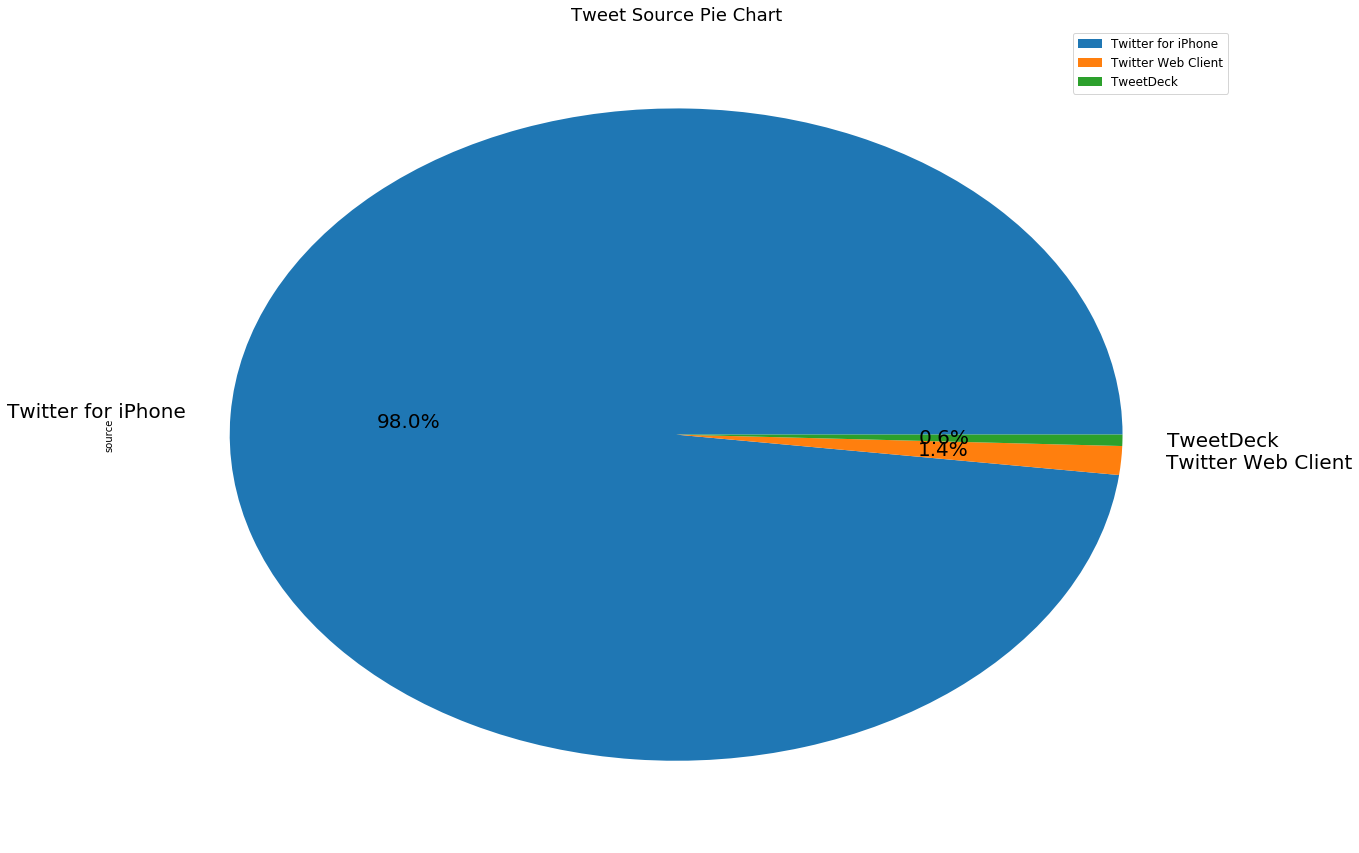

In [80]:
ind = twitter_archive_master_df.source.value_counts().index
source_pie_chart = twitter_archive_master_df.source.value_counts()[ind].plot(kind='pie',autopct='%1.1f%%',fontsize=20,figsize = (20,15))
X = ['Twitter for iPhone', 'Twitter Web Client','TweetDeck']
source_pie_chart.legend(loc='upper right')
plt.title('Tweet Source Pie Chart',fontsize=18)
source_pie_chart.legend(X,fontsize=12);

The pie chart show that:

98.0% of the tweet was from twitter for iphone

0.6% of the tweet was from TweetDeck

1.4% of the the tweet was from Twitter Web client

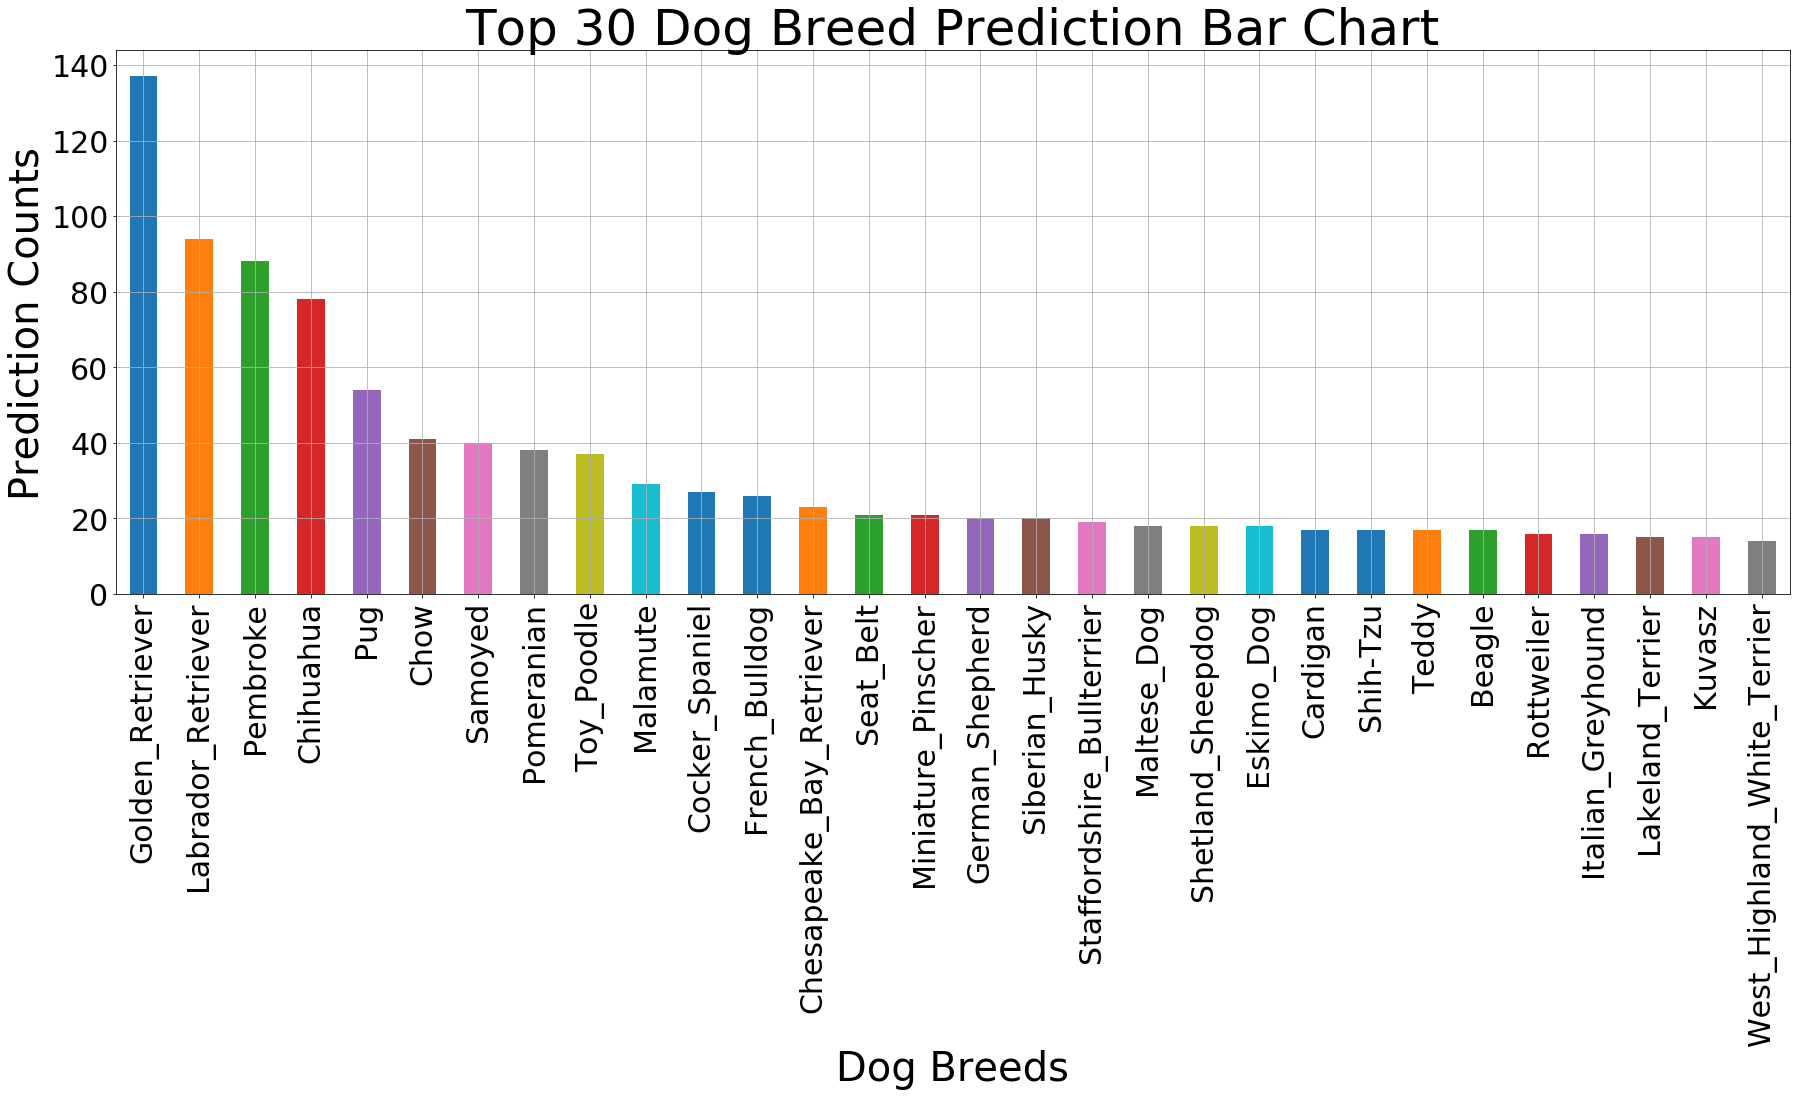

In [81]:
ind2 = twitter_archive_master_df.p1.value_counts().index
prediction_bar_chart = twitter_archive_master_df.p1.value_counts().head(30).plot(kind='bar',grid=True, fontsize=30,figsize = (30,10))
plt.xlabel("Dog Breeds", fontsize = 40)
plt.title('Top 30 Dog Breed Prediction Bar Chart',fontsize=50);
plt.ylabel("Prediction Counts", fontsize = 40)
plt.show();

The bar chart aboves shows the thirty most predicted dog breed. <b>Golden retriever</b> as the most predicted followed by <b>Labrador Retriever</b>

In [83]:
twitter_archive_master_df.query('p1 == "Golden_Retriever"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
14,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,None,None,None,...,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,Golden_Retriever,0.953442,True,Labrador_Retriever,0.013834,True,Redbone,0.007958,True
16,888917238123831296,2017-07-23 00:22:39,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,12,10,Jim,None,None,None,...,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,Golden_Retriever,0.714719,True,Tibetan_Mastiff,0.120184,True,Labrador_Retriever,0.105506,True
17,888804989199671297,2017-07-22 16:56:37,Twitter for iPhone,This is Zeke. He has a new stick. Very proud o...,13,10,Zeke,None,None,None,...,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,Golden_Retriever,0.469760,True,Labrador_Retriever,0.184172,True,English_Setter,0.073482,True
39,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,5,10,Bella,None,None,None,...,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,Golden_Retriever,0.943082,True,Labrador_Retriever,0.032409,True,Kuvasz,0.005501,True
41,883117836046086144,2017-07-07 00:17:54,Twitter for iPhone,Please only send dogs. We don't rate mechanics...,13,10,None,None,None,None,...,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,Golden_Retriever,0.949562,True,Labrador_Retriever,0.045948,True,Kuvasz,0.002471,True
45,882268110199369728,2017-07-04 16:01:23,Twitter for iPhone,This is Alfy. You're witnessing his first wate...,13,10,Alfy,None,None,None,...,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,Golden_Retriever,0.762211,True,Labrador_Retriever,0.098985,True,Cocker_Spaniel,0.017199,True
53,880465832366813184,2017-06-29 16:39:47,Twitter for iPhone,This is Bella. She had her first beach experie...,12,10,Bella,None,None,None,...,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,Golden_Retriever,0.913255,True,Labrador_Retriever,0.026329,True,Cocker_Spaniel,0.009371,True
70,876484053909872640,2017-06-18 16:57:37,Twitter for iPhone,This is Benedict. He wants to thank you for th...,13,10,Benedict,None,None,None,...,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,Golden_Retriever,0.874566,True,Irish_Terrier,0.037354,True,Chow,0.016724,True
93,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,13,10,Zoey,None,None,None,...,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,Golden_Retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_Retriever,0.032621,True
110,865718153858494464,2017-05-19 23:57:46,Twitter for iPhone,Meet Boomer. He's just checking pup on you. Ho...,13,10,Boomer,None,None,None,...,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,Golden_Retriever,0.673664,True,Kuvasz,0.157523,True,Labrador_Retriever,0.126073,True
